In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import math
from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot

a0 = 0.1
b0 = 1
a1 = 2
b1 = 1
sample_points_2_index = 10 #采样点，2^n个point

# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

def evaluate0(X):  # 这里是我们要进行灵敏度分析的模型,接受一个数组,每个数组元素作为模型的一个输入,模型的输出是一个float,干函数返回的时候再讲所有输出并起来
    global a0,b0
    return np.array([ np.sin(x[0]) + a0*np.sin(x[1])**2 + b0*x[2]**4*np.sin(x[0]) for x in X])

def evaluate1(X):  # 这里是我们要进行灵敏度分析的模型,接受一个数组,每个数组元素作为模型的一个输入,模型的输出是一个float,干函数返回的时候再讲所有输出并起来
    global a1,b1
    return np.array([ np.sin(x[0]) + a1*np.sin(x[1])**2 + b1*x[2]**4*np.sin(x[0]) for x in X])
    #return np.array([math.sin(x[0]) + x[1] * math.cos(2 * x[2]) for x in X])

In [2]:
param_values = saltelli.sample(problem, 2**sample_points_2_index)
Y0 = evaluate0(param_values)
Y1 = evaluate1(param_values)
param_values.shape, Y0.shape, Y1.shape

C:\Users\12550\AppData\Local\Temp/ipykernel_26008/491612733.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**sample_points_2_index)


((8192, 3), (8192,), (8192,))

In [3]:
print("Sensitivity Analysis of f0(a=0.1, b=1)")
print(" ")
Si = sobol.analyze(problem, Y0, print_to_console=True)
print()
print("---------------------------------")
print("Sensitivity Analysis of f1(a=2, b=1)")
print(" ")
Si = sobol.analyze(problem, Y1, print_to_console=True)
print()

Sensitivity Analysis of f0(a=0.1, b=1)
 
          ST       ST_conf
x1  0.998083  1.525842e-01
x2  0.000002  3.021276e-07
x3  0.620395  6.572455e-02
          S1   S1_conf
x1  0.405810  0.092823
x2  0.000009  0.000131
x3  0.037057  0.110886
                S2   S2_conf
(x1, x2)  0.011841  0.058786
(x1, x3)  0.595220  0.180540
(x2, x3) -0.000018  0.000195

---------------------------------
Sensitivity Analysis of f1(a=2, b=1)
 
          ST   ST_conf
x1  0.997065  0.153520
x2  0.000914  0.000121
x3  0.619763  0.057193
          S1   S1_conf
x1  0.405022  0.076786
x2  0.001049  0.002580
x3  0.036853  0.104224
                S2   S2_conf
(x1, x2)  0.012143  0.052487
(x1, x3)  0.594848  0.149313
(x2, x3) -0.000354  0.003685



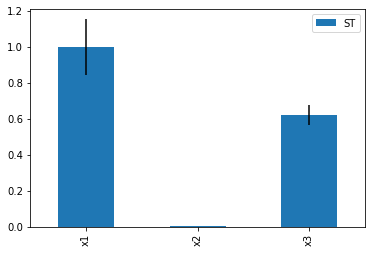

In [4]:
Si_df = Si.to_df()
barplot(Si_df[0])
plot.savefig("ST.svg", dpi=300,format="svg")
plot.show()

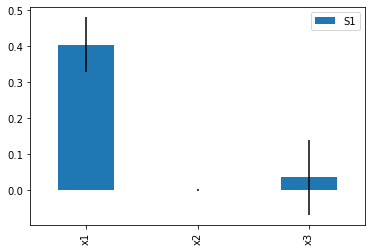

In [5]:
barplot(Si_df[1])
plot.savefig("S1.svg", dpi=300,format="svg")
plot.show()

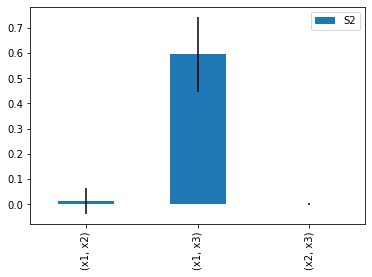

In [6]:
barplot(Si_df[2])
plot.savefig("S2.svg", dpi=300,format="svg")
plot.show()